In [10]:
import sys

sys.path.append('../../globalfunction')  # setting path
import globalfunction.vv as vv  # importing

import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

import sklearn.metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn import model_selection

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



In [2]:
df, data_version_description, numeric_cols, cat_cols = vv.dataset_modelling_version(iteration_code="0011_20220703", row_limit=8000)
print(data_version_description)
print(df.shape)
df.sample(20)

/media/sf_shared_files/Springboard_III/capstone_prep/globalfunction/vv.py:496: DtypeWarning: Columns (23,25,28,31,40,43,44,47,51,56,59,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_json1 = pd.read_csv(LISTING_JSON_MODEL_FILE)  # EDIT 29-06-2022: There are bid listings and regular listings. I scrape them seporately and join them here.


small series of numeric keys
(8000, 10)


,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age
ids,,,,,,,,,,
106860701,475000.0,51.373589,-0.211365,0.6,3.0,1.0,10,20210513,8.0,37.0
124043117,160000.0,51.58355,-0.038770,0.3,1.0,NaN,9,20220617,4.0,37.0
120826415,340000.0,51.441259,-0.223140,0.8,1.0,1.0,14,20220308,9.0,37.0
120128825,575000.0,51.49179,-0.036370,0.5,2.0,2.0,19,20220217,4.0,NaN
120685175,400000.0,51.39363,-0.310380,0.3,1.0,1.0,10,20220304,4.0,37.0
120814658,400000.0,51.397864,-0.298200,0.5,2.0,NaN,14,20220308,4.0,37.0
121187879,400000.0,51.532035,-0.059441,0.1,1.0,1.0,6,20220317,4.0,12.0
120810518,375000.0,51.480533,-0.343007,0.4,2.0,1.0,8,20220308,4.0,37.0
84006876,425000.0,51.56832,0.127815,0.1,3.0,1.0,13,20220222,4.0,37.0


In [5]:
df = vv.tidy_dataset(df, coerce_to_float=['location.latitude'], na_infer_median=['bedrooms_model', 'bathrooms_model'], na_drop_column=[],
                     na_drop_rows=[])

In [ ]:
df.info()

In [6]:
sample_incomplete_rows = df[df.isnull().any(axis=1)]  #.head()
sample_incomplete_rows

,Price,location.latitude,location.longitude,distance_to_any_train,bedrooms_model,bathrooms_model,analyticsProperty.imageCount,analyticsProperty.added,floorplan_count,property_age
ids,,,,,,,,,,
85738833,525000.0,51.520462,-0.442992,1.5,4.0,2.0,10,20220711,4.0,NaN
121385849,525000.0,51.420581,-0.178004,0.2,2.0,1.0,12,20220322,4.0,NaN
85438359,400000.0,51.454550,-0.096260,0.3,1.0,1.0,15,20220607,4.0,NaN
122148851,550000.0,51.416198,-0.157697,0.3,3.0,1.0,6,20220408,4.0,NaN
121793279,500000.0,51.528408,0.018387,0.2,3.0,1.0,14,20220331,4.0,NaN
116069432,365000.0,51.471910,-0.096120,0.4,2.0,1.0,12,20211109,4.0,NaN
121286111,600000.0,51.420340,-0.082440,0.3,3.0,1.0,11,20220319,4.0,NaN
118817096,425000.0,51.467050,-0.269810,0.1,2.0,1.0,10,20220117,4.0,NaN
122625791,325000.0,51.548920,0.061430,0.7,2.0,1.0,11,20220420,1.0,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
y = df['Price']
X = df.drop(['Price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [46]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])  # define the transformer for categorical columns

numeric_no_scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
])  # define the transformer for categorical columns

categorical_transformer1 = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])
features_preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer,
         ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
          'floorplan_count','property_age']),
        ('categorical1', categorical_transformer1, []),  #
        ('categorical2', categorical_transformer2, [])
    ])
features_noscale_preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_no_scale_transformer,
         ['location.latitude', 'location.longitude', 'distance_to_any_train', 'bedrooms_model', 'bathrooms_model', 'analyticsProperty.imageCount', 'analyticsProperty.added',
          'floorplan_count']),
        ('categorical1', categorical_transformer1, []),
        ('categorical2', categorical_transformer2, [])
    ])

features_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added', 'floorplan_count',
                                  'property_age']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 []),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

In [47]:
features_noscale_preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['location.latitude', 'location.longitude',
                                  'distance_to_any_train', 'bedrooms_model',
                                  'bathrooms_model',
                                  'analyticsProperty.imageCount',
                                  'analyticsProperty.added',
                                  'floorplan_count']),
                                ('categorical1',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 []),
                                ('categorical2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 [])])

Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best Score
 -77096.49325760058


KNeighborsRegressor(leaf_size=2, n_neighbors=250)

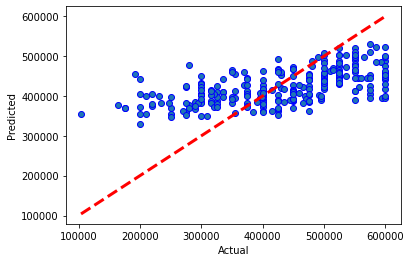

In [48]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

model_tuple = ('NEW - Ridge LR', linear_model.Ridge(),
               [{"estimator__alpha": [.005, .05, .5, 5, 50, 500, 5000, 50000, 500000]}])
model_tuple = ('KNN', KNeighborsRegressor(), [
    {
        'estimator__n_neighbors': [250, 300, 350],
        #"estimator__weights": ['uniform', 'distance'],
        #'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree'], #, 'brute'],
        'estimator__leaf_size': [1, 2, 3],  #, 30, 120],
        # 'estimator__p': [1, 2],
    }
], 15, 3)
model = model_tuple[1]
model.get_params()

params = model_tuple[2]

pipe = Pipeline(steps=[
    ('preprocessor', features_preprocessor),  # preprocess features
    ('estimator', model),
])  # start the training
#print(pipe.get_params())
from sklearn.model_selection import GridSearchCV

#grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_root_mean_squared_error')
#grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_mean_squared_error')
#grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_mean_absolute_error')
grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_mean_absolute_error')
grid.fit(X, y)
print("\nBest Score\n", grid.best_score_)
best_estimator_pipe = grid.best_estimator_

fig, ax = plt.subplots()
ax.scatter(y_test, best_estimator_pipe.predict(X_test), edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')

best_estimator_pipe[1]

In [12]:
best_estimator_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['location.latitude',
                                                   'location.longitude',
                                                   'distance_to_any_train',
                                                   'bedrooms_model',
                                                   'bathrooms_model',
                                                   'analyticsProperty.imageCount',
                                                   'analyticsProperty.added',
                                                   'floorplan_count']),
                                                 ('cate...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['borough_name',
                                                   'analyticsProperty.propertyType',
                                                   'propertySubType',
                                                   'coarse_compass_direction',
                                                   'tenure.tenureType',
                                                   'analyticsProperty.priceQualifier']),
                                                 ('categorical2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [])])),
                ('estimator',
                 KNeighborsRegressor(leaf_size=1, n_neighbors=350))])

In [49]:
def do_grid_or_random_search(model_tuple, cv_type='grid'):
    name, model, params, details = model_tuple

    cv_type = details['cv_type']
    scaler = details.get('scaler', False)
    if cv_type != 'grid':
        p_nIter = details['iterations']
        p_fold = details['folds']

    if 'noscale' in name or not scaler:
        pipe = Pipeline(steps=[
            ('preprocessor', features_noscale_preprocessor),  # preprocess features
            ('estimator', model),
        ])  # start the training
    else:
        pipe = Pipeline(steps=[
            ('preprocessor', features_preprocessor),
            ('estimator', model),  # preprocess features
        ])  # start the training

    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV

    if cv_type == 'grid':
        grid = GridSearchCV(pipe, param_grid=params, cv=3, n_jobs=1, verbose=1, scoring='neg_root_mean_squared_error')
    else:
        grid = RandomizedSearchCV(pipe, param_distributions=params, cv=p_fold, n_jobs=1, verbose=1, scoring='neg_root_mean_squared_error', n_iter=p_nIter)

    grid.fit(X, y)
    print("\nBest Score\n", grid.best_score_)
    print("\nBest Estimator\n", )
    best_estimator_pipeline = grid.best_estimator_
    best_estimator = best_estimator_pipeline.steps[1]
    print(best_estimator)
    print(grid.cv_results_)
    return best_estimator


hhh = ('KNN', KNeighborsRegressor(),
       [{
           'estimator__n_neighbors': [200, 250, 300],
       }],
       {'cv_type': 'grid', 'iterations': 15, 'folds': 3, 'scaler': True})
do_grid_or_random_search(hhh)

Fitting 3 folds for each of 3 candidates, totalling 9 fits

Best Score
 -95031.3467298145

Best Estimator

('estimator', KNeighborsRegressor(n_neighbors=200))
{'mean_fit_time': array([0.03311412, 0.02320091, 0.01869647]), 'std_fit_time': array([0.02434321, 0.00082201, 0.00161495]), 'mean_score_time': array([0.41834537, 0.41038601, 0.37811112]), 'std_score_time': array([0.16528507, 0.05258652, 0.02467879]), 'param_estimator__n_neighbors': masked_array(data=[200, 250, 300],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'estimator__n_neighbors': 200}, {'estimator__n_neighbors': 250}, {'estimator__n_neighbors': 300}], 'split0_test_score': array([-93850.01397483, -94708.86322986, -95552.78956381]), 'split1_test_score': array([-94390.05449699, -95394.24255461, -96258.57664675]), 'split2_test_score': array([-96853.97171763, -97649.23233126, -98401.54207623]), 'mean_test_score': array([-95031.34672981, -95917.44603857, -96737.63609559]),

('estimator', KNeighborsRegressor(n_neighbors=200))

In [50]:
X_train.shape, X_test.shape

((5218, 9), (275, 9))

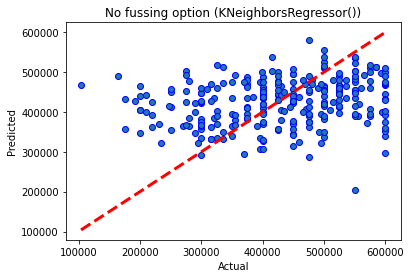

h= 0
Fitting 3 folds for each of 15 candidates, totalling 45 fits

Best Score
 -86689.41569123956

Best Estimator

('estimator', KNeighborsRegressor(leaf_size=9, n_neighbors=10, weights='distance'))
{'mean_fit_time': array([0.02158348, 0.01716208, 0.01423621, 0.0142223 , 0.01576575,
       0.02158578, 0.01776242, 0.01450157, 0.0163095 , 0.01621246,
       0.01368395, 0.01351881, 0.0136439 , 0.01283407, 0.01801825]), 'std_fit_time': array([0.00230247, 0.00136925, 0.00048143, 0.00012602, 0.00074798,
       0.00146106, 0.00235211, 0.00027202, 0.00128433, 0.00216838,
       0.00038622, 0.00093193, 0.00091354, 0.00113133, 0.00219247]), 'mean_score_time': array([0.71850506, 0.59668787, 0.12645356, 0.1258382 , 0.53186035,
       0.17749874, 0.65814821, 0.10635543, 1.01336781, 0.50885216,
       0.15128295, 0.30190508, 0.36324271, 0.1506319 , 0.25147947]), 'std_score_time': array([0.02458474, 0.04708494, 0.00483634, 0.00257315, 0.03780902,
       0.01229569, 0.05885582, 0.00326745, 0.02499257,

/home/guava/Springboard/capstone_prework/venv/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


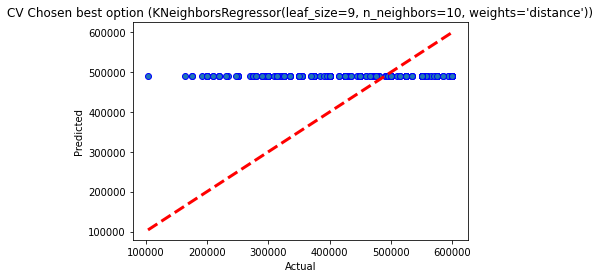

('estimator',
 KNeighborsRegressor(leaf_size=9, n_neighbors=10, weights='distance'))

In [52]:

h = -1
model_tuples = [
    ('KNN scaled', KNeighborsRegressor(),
     [{
            'estimator__n_neighbors': [3,5,10,50,100,200, 250, 300, 350, 400, 500],
            "estimator__weights": ['uniform', 'distance'],
            'estimator__leaf_size': [3, 5, 9, 15, 30, 120],  #, 30, 120],
     }],
     {'cv_type': 'random' if len(X_train) > 1000 else 'grid', 'iterations':15 , 'folds': 3, 'scaler': True}),
]

#KNeighborsRegressor(leaf_size=5, n_neighbors=200, weights='distance'))

fig, ax = plt.subplots()
ax.scatter(y_test, model_tuples[h][1].fit(X_train, y_train).predict(X_test), edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
ax.title.set_text(f'No fussing option ({model_tuples[h][1]})')
plt.show()

# print(\"model_tuples[h]\")
# print(model_tuples[h])
# do_grid_or_random_search(model_tuples[h])
# calculated_best_pipe = do_grid_or_random_search(model_tuples[h])
h = 0
print("h=", h)
calculated_best_pipe = do_grid_or_random_search(model_tuples[h], cv_type='random')
#do_grid_or_random_search(model_tuples[h], cv_type='grid')

print(model_tuples[h])

fig, ax = plt.subplots()
ax.scatter(y_test, calculated_best_pipe[1].predict(X_test), edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
ax.title.set_text(f'CV Chosen best option ({calculated_best_pipe[1]})')
plt.show()

calculated_best_pipe

In [ ]:
len(X_train)

In [15]:
h = 4
print("h=", h)
do_grid_search(model_tuples[h])

h= 4


NameError: name 'do_grid_search' is not defined

In [53]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]


In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
h = 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
h = 2
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
h = 4
print("h=", h)
do_grid_search(model_tuples[h])

In [ ]:
h += 1
print("h=", h)
do_grid_search(model_tuples[h])